# 💎 Diamantanalyser för Guldfynd – Affärsinsikter inför sortimentsutvidgning

## Inledning
Guldfynd, med butiker över hela Norden, överväger att utöka sitt sortiment till att även inkludera diamanter.
Syftet med denna analys är att undersöka diamantmarknaden genom ett tillgängligt dataset för att förstå vad som påverkar priset,
och ge rekommendationer kring vilka diamanttyper som kan vara kommersiellt mest attraktiva att sälja.

---

## Datapreparation
Vi börjar med att ladda in datan, undersöka dess struktur och rensa bort saknade värden för att möjliggöra en pålitlig analys.

---

## Innehållsförteckning

-- Högst upp i documentet ligger innehållsförteckning --

-- Analysen --
1. Pris vs Vikt (Carat)
2. Genomsnittligt Pris per Färg
3. Genomsnittligt Pris per Klarhet
4. Genomsnittligt Pris per Slipkvalitet (Cut)

-- Sammanfattande Insikter

-- Executive Summary ( Förslag till Guldfynds ledning: )

## Analys
- (Intro) Vi börjar med att läsa in Pandas och read_excel så vi kan läsa av excel filen och sen tar ut lite information från den efter vi har droppat tomma fält i Excel documentet vilket vi gör med dropna().

In [ ]:
import pandas as pd

# Läs in data
df = pd.read_excel("diamonds.xlsx")

# Rensa bort rader med saknade värden
df_clean = df.dropna()

# Visa grundläggande information
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 53864 entries, 0 to 53917
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53864 non-null  int64  
 1   carat       53864 non-null  float64
 2   cut         53864 non-null  object 
 3   color       53864 non-null  object 
 4   clarity     53864 non-null  object 
 5   depth       53864 non-null  float64
 6   table       53864 non-null  float64
 7   price       53864 non-null  float64
 8   x           53864 non-null  float64
 9   y           53864 non-null  float64
 10  z           53864 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.9+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48


1. Pris vs Vikt (Carat)
- Insikt: Priset ökar med karat, men inte linjärt. Större diamanter har oproportionerligt högre pris.

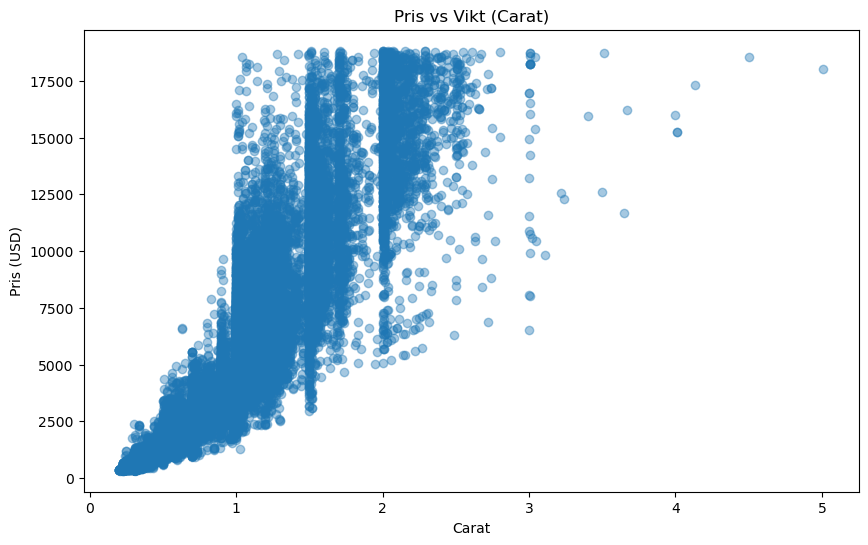

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df_clean["carat"], df_clean["price"], alpha=0.4)
plt.title("Pris vs Vikt (Carat)")
plt.xlabel("Carat")
plt.ylabel("Pris (USD)")
plt.show()


2. Genomsnittligt Pris per Färg
- Insikt: Färger närmare D är generellt dyrare. G-H verkar vara en bra balans mellan pris och färgkvalitet.

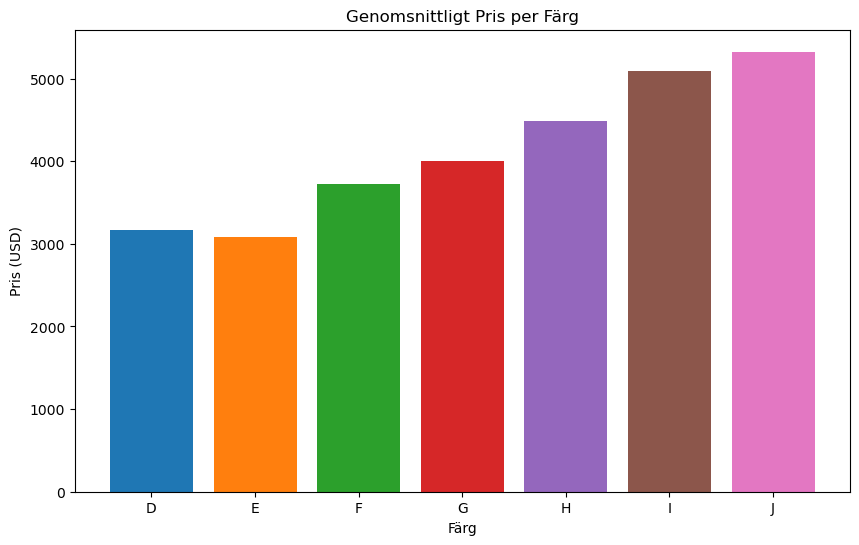

In [ ]:
avg_price_by_color = df_clean.groupby("color")["price"].mean().sort_index()

# Generera en lista med olika färger (t.ex. från colormap 'tab10')
colors = plt.cm.Set3(range(len(avg_price_by_color)))

# Rita stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_color.index, avg_price_by_color.values, color=colors)
plt.title("Genomsnittligt Pris per Färg")
plt.xlabel("Färg")
plt.ylabel("Pris (USD)")
plt.show()

3. Genomsnittligt Pris per Klarhet
- Insikt: Klarhetstyper som VVS1, IF är dyrast. VS2–SI1 är intressanta för pris/prestanda.

In [ ]:
avg_price_by_clarity = df_clean.groupby("clarity")["price"].mean().sort_index()
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_clarity.index, avg_price_by_clarity.values, color="silver")
plt.title("Genomsnittligt Pris per Klarhet")
plt.xlabel("Klarhet")
plt.ylabel("Pris (USD)")
plt.show()


4. Genomsnittligt Pris per Slipkvalitet (Cut)
- Insikt: Slipkvalitet påverkar pris men mindre än klarhet och färg. Premium och Ideal är något dyrare.

In [ ]:
avg_price_by_cut = df_clean.groupby("cut")["price"].mean().sort_index()
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_cut.index, avg_price_by_cut.values, color="green")
plt.title("Genomsnittligt Pris per Slipkvalitet (Cut)")
plt.xlabel("Slipkvalitet")
plt.ylabel("Pris (USD)")
plt.show()


## Sammanfattande Insikter

- Pris påverkas starkt av carat, följt av klarhet och färg.
- Slipkvalitet spelar roll men är inte den starkaste prisfaktorn.
- Det finns möjligheter att hitta värdefulla kombinationer i mellansegmentet (t.ex. 0.7 carat, VS2, färg G).

## Executive Summary

- Fokusera initialt på diamanter i intervallet 0.5–1.0 carat, där prisskillnader är tydliga men inte extrema.
- Välj klarhet VS1–SI1 och färg G–H, där balansen mellan pris och kvalitet är stark.
- Undvik mycket små (<0.3 carat) eller mycket dyra (>2 carat) stenar i ett första sortiment.
- Kombinera diamantförsäljning med pedagogisk kundkommunikation kring vad som påverkar pris (carat, klarhet, färg).